# Sensitivity of the subbasin size on discharge

This example shows how to change the subbasin size repeatedly using the builtin GRASS interface and investigate the changes in discharge of each configuration. 

In [1]:
# hidden cell to setup
import swimpy, os
%matplotlib inline

project_path = os.path.join(os.path.dirname(swimpy.__file__), '../tests/project')
os.chdir(project_path)
if not os.path.exists('swimpy'):
    p = swimpy.project.setup()
    p.browser.settings.unset()

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt

import swimpy

p = swimpy.Project()

# work on a clone to avoid messing things up
c = p.clone('subbasin_size_sensitivity')

# adapt some config parameters for simplification
c.config_parameters(brunoffdat=False)
c.config_parameters(bwam_module=False)
c.config_parameters(brsvmodule=False)
c.output_files.clear()
c.output_files(subbasin_label_daily_selected_stations_discharge=['discharge'])
# turn off runtime warnings (e.g. routing problems due to small subbasins)
c.config_parameters(log_stdout_level='error', log_stderr_level='error')

# r.watershed threshold values
upthresh = [30, 50, 200]
# get clim file averages
mclim = c.climate.inputdata.groupby(axis=1, level=0).mean()

q = pd.DataFrame()
for ut in upthresh:
    # run m.swim.subbasins and necessary postprocesses
    c.subbasin.update(upthresh=ut, verbose=-1)
    # subbasin.csv column 'output_label' required for output
    catch_lab = c.stations[['NAME', 'subbasinID']]
    catch_lab.reset_index(inplace=True)
    catch_lab.rename(columns={'NAME': 'output_label',
                              'subbasinID': 'subbasin_id'}, inplace=True)
    catch_lab.set_index('subbasin_id', inplace=True)
    sdf = c.subbasin.join(catch_lab)
    sdf['output_label'] = sdf['output_label'].fillna('')
    c.subbasin(data = sdf)
    # get mean subbasin size and count
    sb_size = c.subbasin.attributes['size']
    nsb = len(sb_size)
    # put mean values and right number of subbasins into clim files
    nclim = pd.DataFrame({(v, i+1): mclim[v] for v in mclim.columns for i in range(nsb)})
    nclim.columns.names = ['variable', 'subbasin_id']
    c.climate.inputdata(nclim)
    # run SWIM
    c.run(save=False, quiet=True)
    # keep Q at Blankenstein
    label = '%1.1f (n=%i)' % (sb_size.mean(), nsb)
    q[label] = c.subbasin_label_daily_selected_stations_discharge['discharge']['BLANKENSTEIN']
    print('Upthresh %s -> mean subbasin size %s' % (ut, label))


GIS Environment:
GISDBASE: /home/tobias/apps/swimpy_redesign/tests/grassdb
LOCATION_NAME: utm32n
MAPSET: swim
Parameters:
elevation: elevation@PERMANENT
stations: stations@PERMANENT
streamthresh: 200
upthresh: 30
lothresh: 1.6
upthreshcolumn:
depression:
accumulation: accumulation
drainage: drainage
streams: streams
subbasins: subbasins
catchments: catchments
catchmentprefix: catchment_
stations_snapped: stations_snapped
slopesteepness: slopesteepness
slopelength: slopelength
streamcarve:
predefined: reservoirs@PERMANENT
rwatershedflags: s
rwatershedmemory:
d: False
g: False
l: False
s: False
k: False
v: False
Processing DEM to derive accumulation, drainage and streams...
ABSCHNITT 1a (von 6): Initiiere den Speicher.
ABSCHNITT 1b (of 6): Ermittle den Fluß aus der Karte heraus.
   0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72  76  80  84  88  92  96 100
SECTION 2: A* Search.
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40 

Catchment sizes :
ID  excl. upstream   incl. upstream  outlet subbasin  upstream stations
  1         523.63           523.63                8  
  2         488.44          1012.07                1  1
-----------------------------------------------------------------
Subbasin statistics (km2):
stationID count    min      mean     max     
    total       17     1.89    59.53   244.10
        1       11     1.89    47.60   153.18
        2        6     5.33    81.41   244.10
-----------------------------------------------------------------


GIS Environment:
GISDBASE: /home/tobias/apps/swimpy_redesign/tests/grassdb
LOCATION_NAME: utm32n
MAPSET: swim
Parameters:
subbasins: subbasins
accumulation: accumulation
drainage: drainage
routingnet: routingnetwork
mainstreams: mainstreams
outlets: subbasinoutlets
inlets: subbasininlets
output:
/home/tobias/apps/swimpy_redesign/tests/project/swimpy/clones/subbasin_size_sensitivity/input/subbasin_routing.csv
fromto:
minmainstreams: 50
rivercourse:
r: False
k: False
v: False
Will calculate routing for subbasins
All subsequent raster operations will be limited to the MASK area. Removing
or renaming raster map named 'MASK' will restore raster operations to
normal.
Searching outlets...
Growing outlets...
Searching inlets...
WARNUNG: Vektorkarte <subbasinoutlets> existiert bereits und wird
         überschrieben.
Getting inletIDs...
WARNUNG: Vektorkarte <subbasininlets> existiert bereits und wird
         überschrieben.
WARNUNG: Rastertyp ist Fließkomma und der Spaltentyp ist Integer. Etwas

Upthresh 30 -> mean subbasin size 59.5 (n=17)


GIS Environment:
GISDBASE: /home/tobias/apps/swimpy_redesign/tests/grassdb
LOCATION_NAME: utm32n
MAPSET: swim
Parameters:
elevation: elevation@PERMANENT
stations: stations@PERMANENT
streamthresh: 200
upthresh: 50
lothresh: 1.6
upthreshcolumn:
depression:
accumulation: accumulation
drainage: drainage
streams: streams
subbasins: subbasins
catchments: catchments
catchmentprefix: catchment_
stations_snapped: stations_snapped
slopesteepness: slopesteepness
slopelength: slopelength
streamcarve:
predefined: reservoirs@PERMANENT
rwatershedflags: s
rwatershedmemory:
d: False
g: False
l: False
s: False
k: False
v: False
Processing DEM to derive accumulation, drainage and streams...
ABSCHNITT 1a (von 6): Initiiere den Speicher.
ABSCHNITT 1b (of 6): Ermittle den Fluß aus der Karte heraus.
   0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72  76  80  84  88  92  96 100
SECTION 2: A* Search.
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40 

Catchment sizes :
ID  excl. upstream   incl. upstream  outlet subbasin  upstream stations
  1         523.63           523.63                4  
  2         488.44          1012.07                1  1
-----------------------------------------------------------------
Subbasin statistics (km2):
stationID count    min      mean     max     
    total       11     1.74    92.01   244.34
        1        9     1.74    58.18   153.18
        2        2   244.10   244.22   244.34
-----------------------------------------------------------------


GIS Environment:
GISDBASE: /home/tobias/apps/swimpy_redesign/tests/grassdb
LOCATION_NAME: utm32n
MAPSET: swim
Parameters:
subbasins: subbasins
accumulation: accumulation
drainage: drainage
routingnet: routingnetwork
mainstreams: mainstreams
outlets: subbasinoutlets
inlets: subbasininlets
output:
/home/tobias/apps/swimpy_redesign/tests/project/swimpy/clones/subbasin_size_sensitivity/input/subbasin_routing.csv
fromto:
minmainstreams: 50
rivercourse:
r: False
k: False
v: False
Will calculate routing for subbasins
All subsequent raster operations will be limited to the MASK area. Removing
or renaming raster map named 'MASK' will restore raster operations to
normal.
Searching outlets...
Growing outlets...
Searching inlets...
WARNUNG: Vektorkarte <subbasinoutlets> existiert bereits und wird
         überschrieben.
Getting inletIDs...
WARNUNG: Vektorkarte <subbasininlets> existiert bereits und wird
         überschrieben.
WARNUNG: Rastertyp ist Fließkomma und der Spaltentyp ist Integer. Etwas

Upthresh 50 -> mean subbasin size 92.0 (n=11)


GIS Environment:
GISDBASE: /home/tobias/apps/swimpy_redesign/tests/grassdb
LOCATION_NAME: utm32n
MAPSET: swim
Parameters:
elevation: elevation@PERMANENT
stations: stations@PERMANENT
streamthresh: 200
upthresh: 200
lothresh: 1.6
upthreshcolumn:
depression:
accumulation: accumulation
drainage: drainage
streams: streams
subbasins: subbasins
catchments: catchments
catchmentprefix: catchment_
stations_snapped: stations_snapped
slopesteepness: slopesteepness
slopelength: slopelength
streamcarve:
predefined: reservoirs@PERMANENT
rwatershedflags: s
rwatershedmemory:
d: False
g: False
l: False
s: False
k: False
v: False
Processing DEM to derive accumulation, drainage and streams...
ABSCHNITT 1a (von 6): Initiiere den Speicher.
ABSCHNITT 1b (of 6): Ermittle den Fluß aus der Karte heraus.
   0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72  76  80  84  88  92  96 100
SECTION 2: A* Search.
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40

Catchment sizes :
ID  excl. upstream   incl. upstream  outlet subbasin  upstream stations
  1         523.63           523.63                3  
  2         488.44          1012.07                1  1
-----------------------------------------------------------------
Subbasin statistics (km2):
stationID count    min      mean     max     
    total        5     1.61   202.41   520.28
        1        3     1.61   174.54   520.28
        2        2   244.10   244.22   244.34
-----------------------------------------------------------------


GIS Environment:
GISDBASE: /home/tobias/apps/swimpy_redesign/tests/grassdb
LOCATION_NAME: utm32n
MAPSET: swim
Parameters:
subbasins: subbasins
accumulation: accumulation
drainage: drainage
routingnet: routingnetwork
mainstreams: mainstreams
outlets: subbasinoutlets
inlets: subbasininlets
output:
/home/tobias/apps/swimpy_redesign/tests/project/swimpy/clones/subbasin_size_sensitivity/input/subbasin_routing.csv
fromto:
minmainstreams: 50
rivercourse:
r: False
k: False
v: False
Will calculate routing for subbasins
All subsequent raster operations will be limited to the MASK area. Removing
or renaming raster map named 'MASK' will restore raster operations to
normal.
Searching outlets...
Growing outlets...
Searching inlets...
WARNUNG: Vektorkarte <subbasinoutlets> existiert bereits und wird
         überschrieben.
Getting inletIDs...
WARNUNG: Vektorkarte <subbasininlets> existiert bereits und wird
         überschrieben.
WARNUNG: Rastertyp ist Fließkomma und der Spaltentyp ist Integer. Etwas

Upthresh 200 -> mean subbasin size 202.4 (n=5)


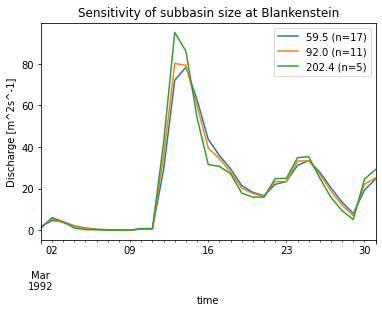

In [3]:
# visualise results
ax = q['1992-03-01':'1992-03-31'].plot()
plt.title('Sensitivity of subbasin size at Blankenstein')
yl = plt.ylabel('Discharge [m^2s^-1]')  